In [1]:
import os
import sys
from glob import glob
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict
import random

%matplotlib inline

/Users/erengwa/myworkspace/anaconda3/envs/carnd-advdl-odlab/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [5]:
def load_graph(graph_file):
    """Loads a frozen inference graph"""
    graph = tf.Graph()
    with graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile(graph_file, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    return graph


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

def class_to_color(class_id, prob):
    if prob < .5:
        return "UNKNOWN"
    
    if class_id == 1:
        return "GREEN"
    elif class_id == 2:
        return "RED"
    elif class_id == 3:
        return "YELLOW"
    else:
        return "UNKNOWN"

In [6]:
## Test model
PATH_TO_GRAPH = 'model/frozen_inference_graph_large_real.pb' ## load SSD trained on udacity's parking lot images
PATH_TO_LABELS = 'data/label_map.pbtxt'
NUM_CLASSES = 4

detection_graph = load_graph(PATH_TO_GRAPH)

SCORES:0.98 CLASSES:1.0 and classided as GREEN


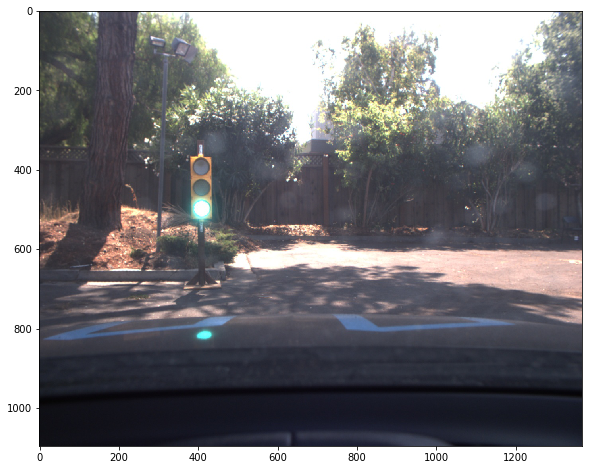

SCORES:1.00 CLASSES:2.0 and classided as RED


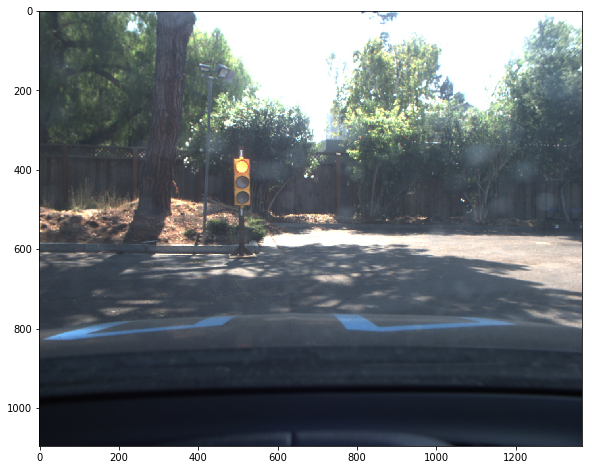

SCORES:0.98 CLASSES:3.0 and classided as YELLOW


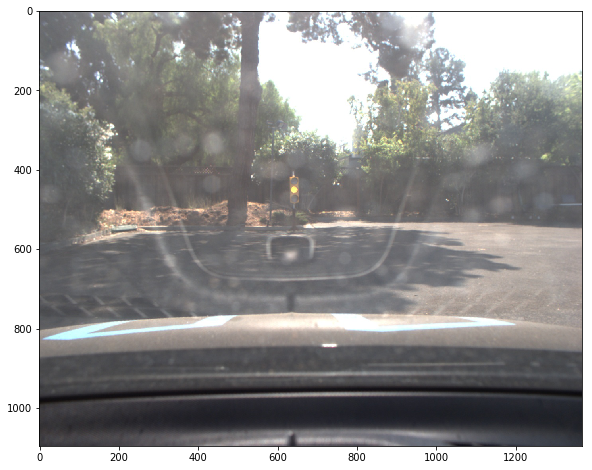

SCORES:0.00 CLASSES:3.0 and classided as UNKNOWN


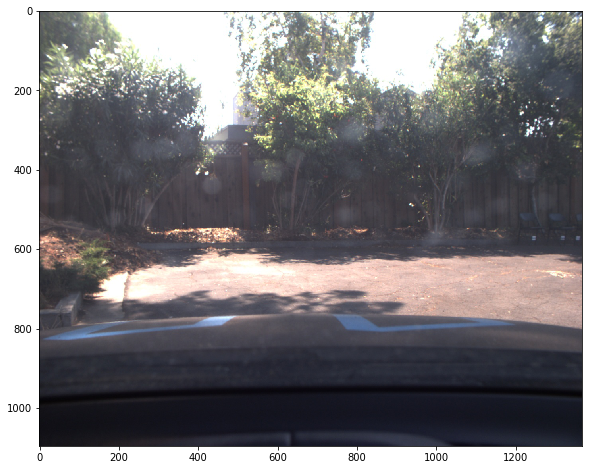

SCORES:0.74 CLASSES:3.0 and classided as YELLOW


SCORES:0.00 CLASSES:3.0 and classided as UNKNOWN


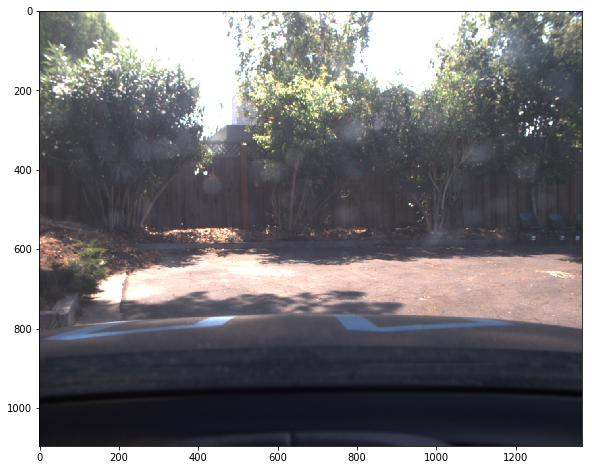

SCORES:0.99 CLASSES:1.0 and classided as GREEN


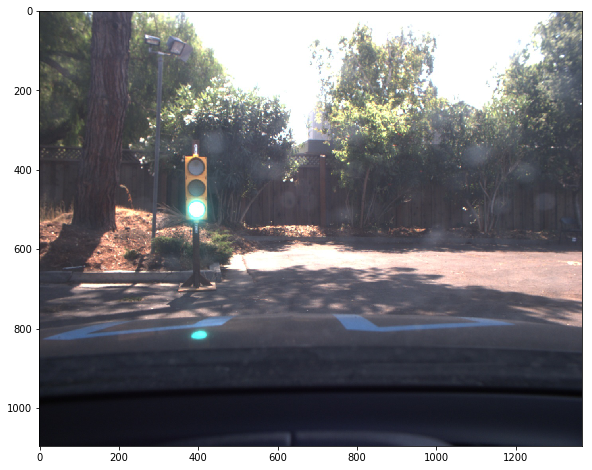

SCORES:1.00 CLASSES:2.0 and classided as RED


SCORES:0.00 CLASSES:2.0 and classided as UNKNOWN


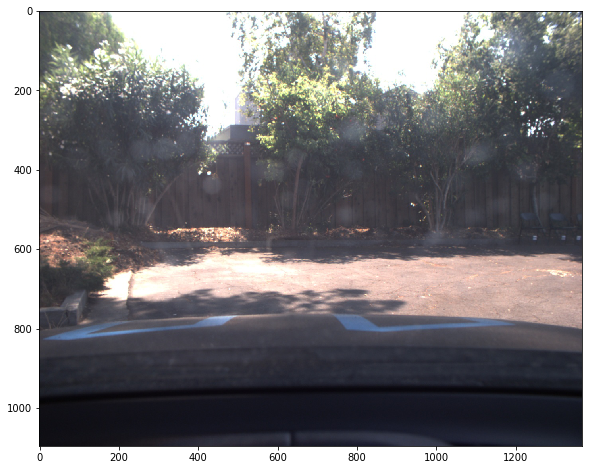

SCORES:0.26 CLASSES:3.0 and classided as UNKNOWN


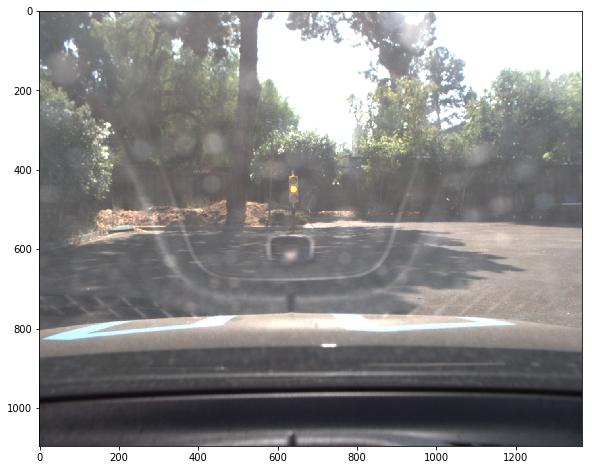

SCORES:0.98 CLASSES:1.0 and classided as GREEN


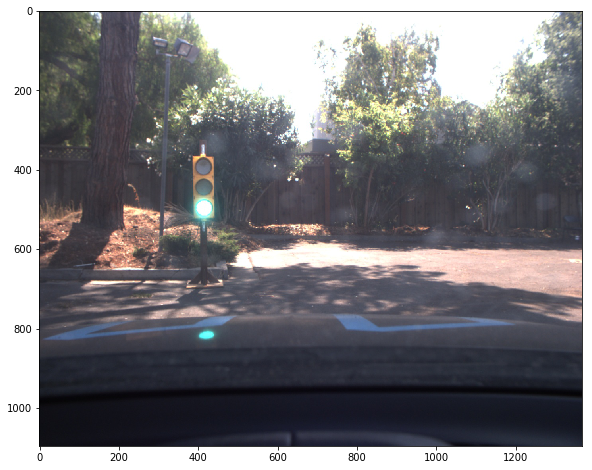

SCORES:1.00 CLASSES:2.0 and classided as RED


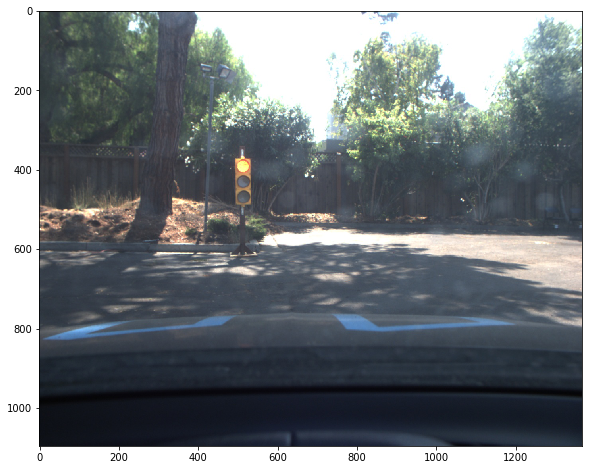

In [12]:
PATH_TO_IMGS = 'data/sample_real'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, '*.jpg'))
random.shuffle(TEST_IMGS)

# pick only 3 items
TEST_IMGS = TEST_IMGS[:20]

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            
            class_id, prob = classes[0][0], scores[0][0]                    
            print('SCORES:{0:.2f} CLASSES:{1} and classided as {2}'.format(prob, class_id, class_to_color(class_id, prob)))            
            plt.figure(figsize=(12,8))
            plt.imshow(image_np)
            plt.show()            